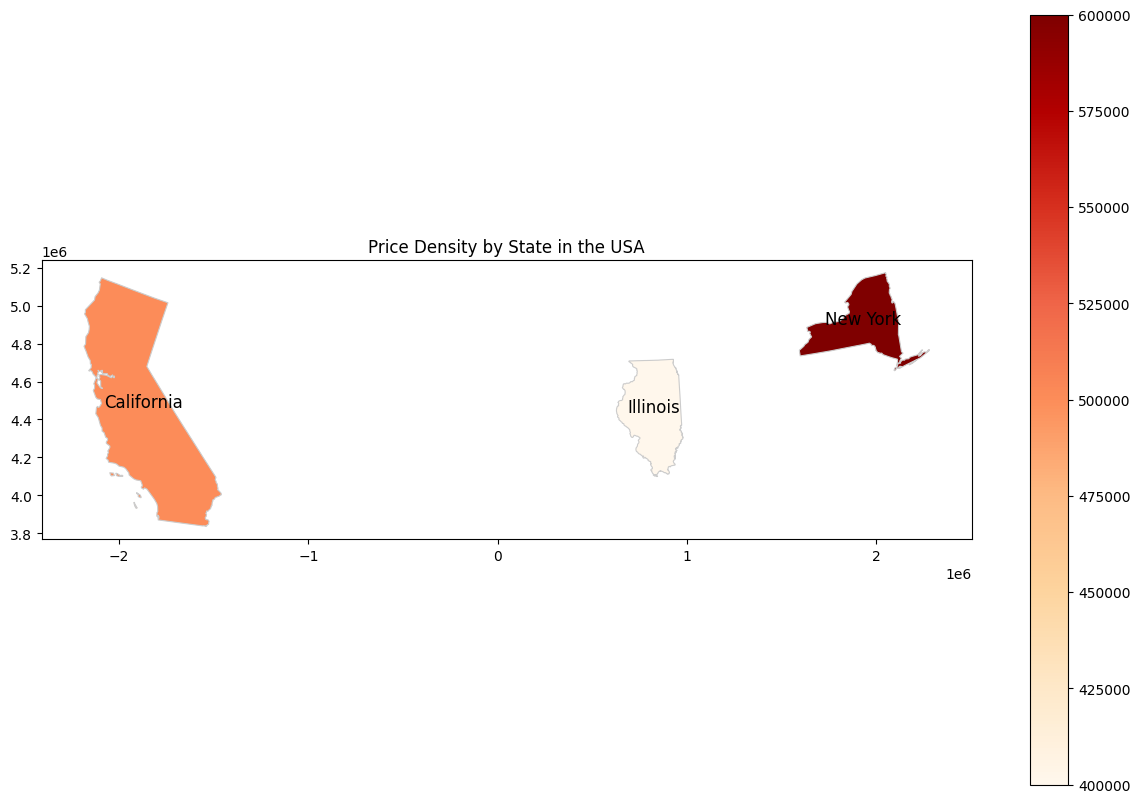

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('realtor-data.zip.csv')

data = pd.DataFrame({
    'state': ['California', 'New York', 'Illinois'],
    'price': [500000, 600000, 400000]
})

states = gpd.read_file(r'D:\ASG_PRJ\Lab\Lab 3\Lab3\PRJ2\us_data\us_states.shp')

merged = states.merge(data, left_on='STATE_NAME', right_on='state', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(column='price', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE_NAME']):
    if label in data['state'].values:  # Only label states in your dataset
        ax.text(x, y, label, fontsize=12, ha='center', color='black')

plt.title('Price Density by State in the USA')

plt.show()


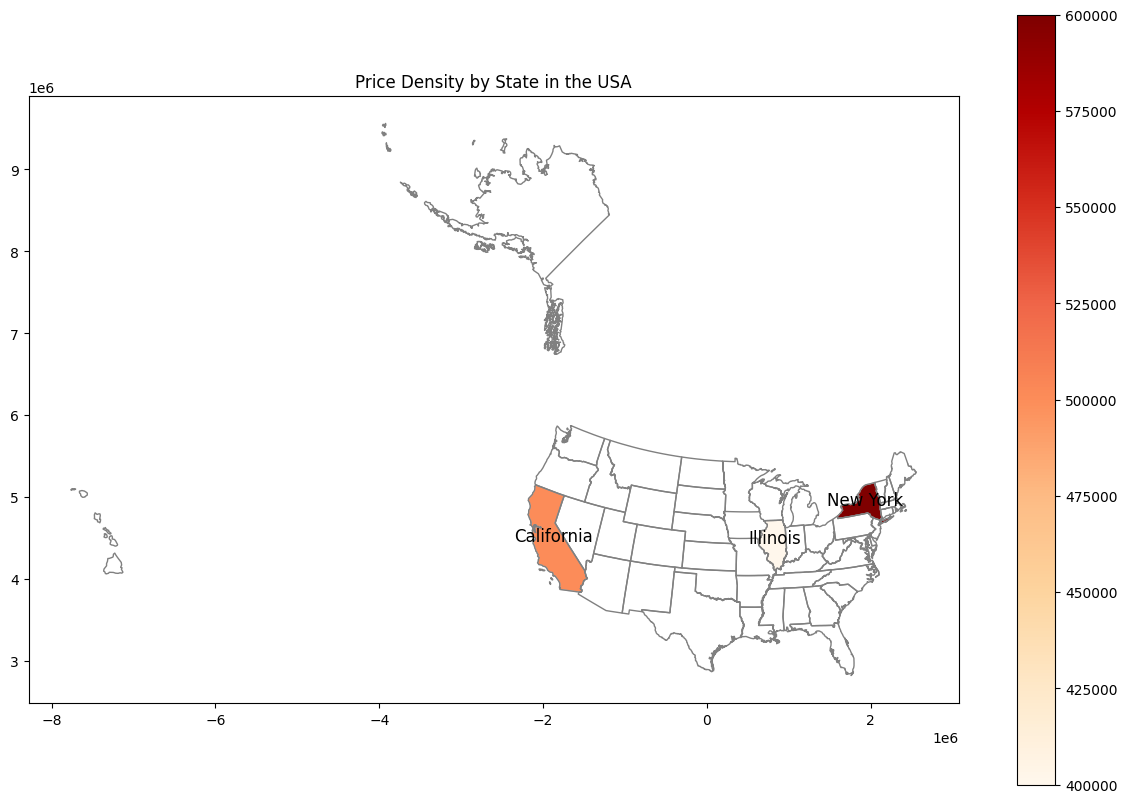

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'state': ['California', 'New York', 'Illinois'],
    'price': [500000, 600000, 400000]
})


states = gpd.read_file(r'D:\ASG_PRJ\Lab\Lab 3\Lab3\PRJ2\us_data\us_states.shp')

merged = states.merge(data, left_on='STATE_NAME', right_on='state', how='left')

fig, ax = plt.subplots(1, 1, figsize=(15, 10)) 

states.boundary.plot(ax=ax, linewidth=1, edgecolor='gray')  

merged.plot(column='price', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE_NAME']):
    if label in data['state'].values: 
        ax.text(x, y, label, fontsize=12, ha='center', color='black')

plt.title('Price Density by State in the USA')

plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# Sample data
data = pd.read_csv(r'realtor-data.zip.csv')

# Load shapefile for US states
states = gpd.read_file(r'D:\ASG_PRJ\Lab\Lab 3\Lab3\PRJ2\us_data\us_states.shp')

# Merge shapefile data with the price data
merged = states.merge(data, left_on='STATE_NAME', right_on='state', how='left')

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot state boundaries
states.boundary.plot(ax=ax, linewidth=1, edgecolor='gray')

# Plot the merged data with the price column using the 'OrRd' color map
cmap = plt.get_cmap('OrRd')
norm = mcolors.Normalize(vmin=merged['price'].min(), vmax=merged['price'].max())
merged.plot(column='price', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate the states with their names
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['STATE_NAME']):
    if label in data['state'].values: 
        ax.text(x, y, label, fontsize=12, ha='center', color='black')

# Extract the color corresponding to each state's price using the colormap
legend_elements = []
for state, price in zip(data['state'], data['price']):
    color = cmap(norm(price))
    hex_color = mcolors.to_hex(color)
    
    # Dynamically generate the legend label based on the state name, color code, and color name
    label = f"{state} #{hex_color} : {mcolors.rgb2hex(color)}"
    legend_elements.append(Patch(facecolor=color, label=label))

# Add the custom legend
ax.legend(handles=legend_elements, title="Price by State and Color", loc='upper left', fontsize=10)

# Add title and show plot
plt.title('Price Density by State in the USA', fontsize=15)
plt.show()
